### Support Vector Machine
    Draws a hyper plane in n dimentional space such that it maximizes margin between classification groups

<div style="display:flex">
    <img src='./images/svm1.png' style="height: 450px; width: 700px;"></img>
    <img src='./images/svm2.png' style="height: 450px; width: 700px;"></img>
</div>

##### Regularization & Gamma
    Regularization(C) is a hypermeter which is set before the training model and used to control error and Gamma is also a hypermeter which is set before the training model and used to give curvature weight of the decision boundary.

<div style="display:flex">
    <img src='./images/svm4.png' style="height: 450px; width: 700px;"></img>
    <img src='./images/svm3.png' style="height: 450px; width: 700px;"></img>
</div>

In [383]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [384]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [385]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [386]:
# we use 'apply' in pandas when one column is generated from another column
df['target_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [387]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]

Text(0, 0.5, 'petal width (cm)')

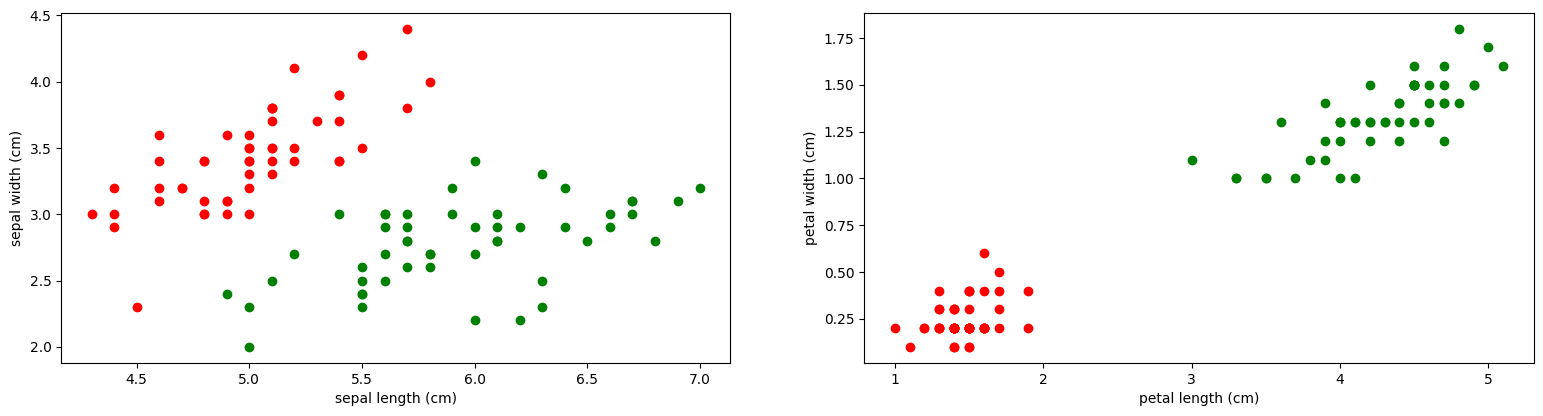

In [388]:
import matplotlib.pyplot as plt
import numpy as np
import random 

plt.figure(figsize=(19,10))

plt.subplot(2,2,1)
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],c='r')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],c='g')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


plt.subplot(2,2,2)
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],c='r')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],c='g')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [389]:
from sklearn.model_selection import train_test_split

X = df.drop(['target', 'target_name'], axis='columns')
Y = df['target']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.5)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(75, 4) (75, 4) (75,) (75,)


In [390]:
from sklearn.svm import SVC

def func(c=1,g='scale',k='rbf'):
    model = SVC(C=c, gamma=g, kernel=k)
    model.fit(X_train, Y_train)
    
    return model.score(X_test, Y_test)

Text(0, 0.5, 'Accuracy(%)')

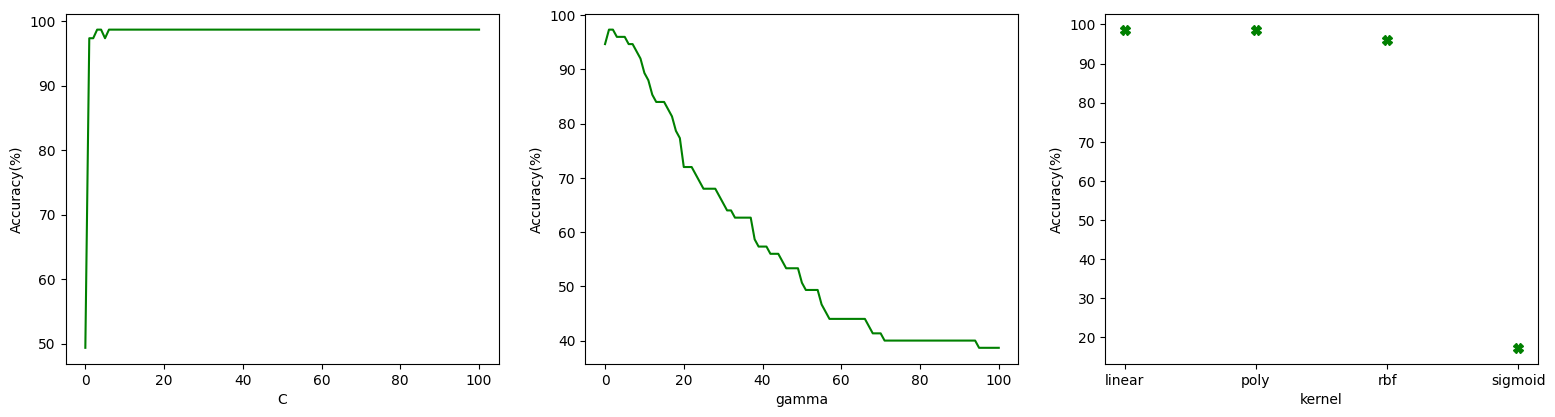

In [392]:
from numpy import size

x = np.linspace(0.01, 100, 101)
a,b,c,d = [], [], ['linear', 'poly', 'rbf', 'sigmoid'],[]

for i in x:
    a.append(100*func(c=i))
    b.append(100*func(g=i))
    
for i in c:
    d.append(100*func(k=i))
    
plt.figure(figsize=(19,10))

plt.subplot(2,3,1)
plt.plot(x, a, color='green')
plt.xlabel('C')
plt.ylabel('Accuracy(%)')

plt.subplot(2,3,2)
plt.plot(x, b, color='green')
plt.xlabel('gamma')
plt.ylabel('Accuracy(%)')

plt.subplot(2,3,3)
plt.plot(c, d, 'gX', markersize=7)
plt.xlabel('kernel')
plt.ylabel('Accuracy(%)')